In [1]:
# pandasモジュールの読み込み
import pandas as pd
# グラフ描画ライブラリmatplotlibの読み込み
import matplotlib.pyplot as plt
# 数値計算用ライブラリnumpyの読み込み
import numpy as np
# 村上3次元の特徴量データを読み込み
df = pd.read_csv('arange_feature_all.csv')

In [2]:
# Unnamed: 0の行を削除
df = df.drop('Unnamed: 0',axis=1)

In [3]:
df.tail()

,name,Face_shape,Hair_len,Eyelid,Eye_shape,Nose_shape,Nose_len,Nose_bridge,Eyebrows,Lips,Mouse,Tears_bag,Dis_eye_brows,Forehead,Barb,Gills,Dis_nose_mouse,Value_of_murakami,Value_of_yoshi,Cloth_color
204,103,3.0,0.0,0.0,3.0,NaN,NaN,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,茶
205,104,3.0,0.0,2.0,3.0,NaN,NaN,1.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0,0,黄色
206,105,4.0,1.0,2.0,4.0,NaN,NaN,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0,1,柄
207,106,3.0,1.0,0.0,3.0,0.0,NaN,1.0,2.0,0.0,2.0,1.0,1.0,2.0,1.0,0.0,1.0,1,0,黒
208,107,0.0,0.0,1.0,2.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,柄


カイ二乗検定　クロス集計表の作成

In [4]:
df_cross_sample = df[['Value_of_murakami','Value_of_yoshi','Cloth_color']]

In [5]:
df_cross_sample = df_cross_sample[df_cross_sample['Cloth_color']!='服の色']

In [6]:
df_cross_sample['Value_yoshi_murakami'] = 0
df_cross_sample = df_cross_sample.replace({'チェック青':'青','薄青':'青','紺':'青','ライトグリーン':'緑','茶':'茶色','薄紫':'紫','水色':'青'})
df_cross_sample = df_cross_sample.replace({'柄':'Pattern','白':'White','グレー':'Gray','ピンク':'Pink','紫':'Purple','緑':'Green','肌色':'Flesh','茶色':'Brown','赤':'Red','青':'Blue','黄色':'Yellow','黒':'Black'})

In [7]:
df_cross_sample.loc[(df_cross_sample['Value_of_murakami']==1) & (df_cross_sample['Value_of_yoshi']==1),'Value_yoshi_murakami'] = 1

In [8]:
df_cross_sample

,Value_of_murakami,Value_of_yoshi,Cloth_color,Value_yoshi_murakami
0,1,0,Pattern,0
1,1,0,Pattern,0
2,1,1,White,1
3,1,0,Black,0
4,1,1,Black,1
5,1,1,White,1
6,1,1,White,1
7,1,0,Black,0
8,1,0,Black,0
9,1,0,Blue,0


## 吉どんと村上に分けて相関関係を考える

In [9]:
# よしどんがかわいいと思った人の服の色を抽出
yoshi_color = df_cross_sample[df_cross_sample['Value_of_yoshi']==1]['Cloth_color'].value_counts()
yoshi_color_not = df_cross_sample[df_cross_sample['Value_of_yoshi']==0]['Cloth_color'].value_counts()
# 村上がかわいいと思った人の服の色を抽出
murakami_color = df_cross_sample[df_cross_sample['Value_of_murakami']==1]['Cloth_color'].value_counts()
murakami_color_not = df_cross_sample[df_cross_sample['Value_of_murakami']==0]['Cloth_color'].value_counts()

color_mode = pd.concat([yoshi_color,murakami_color],axis=1)
color_mode_not = pd.concat([yoshi_color_not,murakami_color_not],axis=1)

C:\Users\k31m0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
C:\Users\k31m0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [10]:
color_mode.columns = ['Yoshi','Murakami']
color_mode_not.columns = ['Yoshi','Murakami']

In [11]:
color_mode = color_mode.fillna(0)
color_mode_not = color_mode_not.fillna(0)

In [12]:
color_mode

,Yoshi,Murakami
Black,11.0,26
Blue,7.0,7
Brown,6.0,4
Flesh,0.0,1
Gray,9.0,4
Green,2.0,1
Pattern,16.0,13
Pink,2.0,3
Purple,3.0,2
Red,3.0,2


In [13]:
color_mode_not

,Yoshi,Murakami
Black,25,10.0
Blue,9,9.0
Brown,5,7.0
Flesh,1,0.0
Gray,1,6.0
Green,2,3.0
Pattern,14,17.0
Pink,5,4.0
Purple,3,4.0
Red,1,2.0


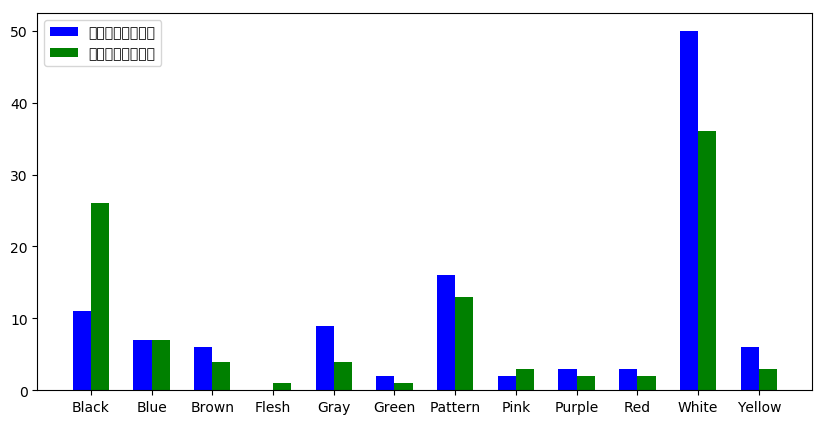

In [14]:
y1 = color_mode['Yoshi']
y2 = color_mode['Murakami']

left = np.arange(len(y1))
labels = color_mode.index
plt.figure(figsize=(10,5),dpi=100)
plt.bar(left,y1,color='b',width=0.3,label='吉丼（かわいい）',align='center')
plt.bar(left+0.3,y2,color='g',width=0.3,label='村上（かわいい）',align='center')

plt.xticks(left + 0.3/2, labels)
plt.legend(loc=2)


plt.show()

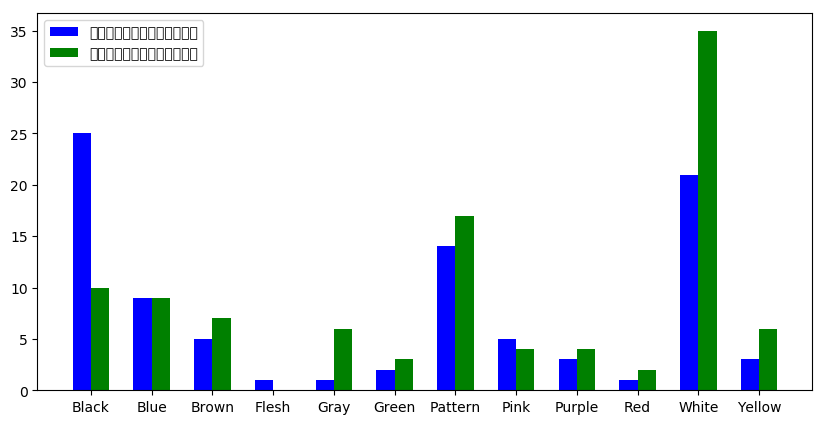

In [15]:
y1 = color_mode_not['Yoshi']
y2 = color_mode_not['Murakami']

left = np.arange(len(y1))
labels = color_mode.index
plt.figure(figsize=(10,5),dpi=100)
plt.bar(left,y1,color='b',width=0.3,label='吉丼（かわいいと思わない）',align='center')
plt.bar(left+0.3,y2,color='g',width=0.3,label='村上（かわいいと思わない）',align='center')

plt.xticks(left + 0.3/2, labels)
plt.legend(loc=2)


plt.show()

青が吉丼で緑が村上で可愛いと思った人の服の色とその度数を表す棒グラフ

In [16]:
# csvとして服の色をインデックスにとる2人のかわいいに該当する数を表す表を出力
# color_mode.to_csv('color_mode.csv')

# 服の色、可愛い、顔の特徴量3つの関係を考える

In [17]:
# 整形後データの内容確認
df.head()

,name,Face_shape,Hair_len,Eyelid,Eye_shape,Nose_shape,Nose_len,Nose_bridge,Eyebrows,Lips,Mouse,Tears_bag,Dis_eye_brows,Forehead,Barb,Gills,Dis_nose_mouse,Value_of_murakami,Value_of_yoshi,Cloth_color
0,sample1,0.0,0.0,1.0,2.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1,0,柄
1,sample2,0.0,0.0,1.0,2.0,NaN,NaN,0.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,1,0,柄
2,sample3,3.0,0.0,1.0,2.0,NaN,NaN,0.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,1,1,白
3,アドリアナ・リマ,0.0,0.0,1.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,0,黒
4,アンジェラ・ベイビー,2.0,0.0,1.0,2.0,NaN,NaN,0.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1,1,黒


2人のどちらかがかわいいと思った人のデータを抽出

In [18]:
df_pretty = df[(df['Value_of_murakami'] == 1) | (df['Value_of_yoshi'] == 1)]

In [19]:
df_pretty

,name,Face_shape,Hair_len,Eyelid,Eye_shape,Nose_shape,Nose_len,Nose_bridge,Eyebrows,Lips,Mouse,Tears_bag,Dis_eye_brows,Forehead,Barb,Gills,Dis_nose_mouse,Value_of_murakami,Value_of_yoshi,Cloth_color
0,sample1,0.0,0.0,1.0,2.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1,0,柄
1,sample2,0.0,0.0,1.0,2.0,NaN,NaN,0.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,1,0,柄
2,sample3,3.0,0.0,1.0,2.0,NaN,NaN,0.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,1,1,白
3,アドリアナ・リマ,0.0,0.0,1.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,0,黒
4,アンジェラ・ベイビー,2.0,0.0,1.0,2.0,NaN,NaN,0.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1,1,黒
5,アンジェリーナ・ダニロヴァ,0.0,0.0,1.0,2.0,NaN,NaN,1.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,1,1,白
6,アンハサウェイ,3.0,0.0,1.0,2.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1,1,白
7,エマストーン,0.0,0.0,1.0,2.0,0.0,NaN,0.0,2.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1,0,黒
8,エマワトソン,0.0,0.0,1.0,2.0,NaN,NaN,0.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1,0,黒
9,カーラ・デルヴィーニュ,0.0,0.0,1.0,2.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1,0,青


In [20]:
# Cloth_colorに服の色という項目が混じっていたので削除
df_pretty = df_pretty[df_pretty['Cloth_color']!='服の色']

In [21]:
# 判別が難しい色はそれより上位の色に分類
df_pretty = df_pretty.replace({'チェック青':'青','薄青':'青','紺':'青','ライトグリーン':'緑','茶':'茶色','薄紫':'紫','水色':'青'})
# 色の名前を変更(好みの問題)
df_pretty = df_pretty.replace({'柄':'Pattern','白':'White','グレー':'Gray','ピンク':'Pink','紫':'Purple','緑':'Green','肌色':'Flesh','茶色':'Brown','赤':'Red','青':'Blue','黄色':'Yellow','黒':'Black'})

In [22]:
df_pretty

,name,Face_shape,Hair_len,Eyelid,Eye_shape,Nose_shape,Nose_len,Nose_bridge,Eyebrows,Lips,Mouse,Tears_bag,Dis_eye_brows,Forehead,Barb,Gills,Dis_nose_mouse,Value_of_murakami,Value_of_yoshi,Cloth_color
0,sample1,0.0,0.0,1.0,2.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1,0,Pattern
1,sample2,0.0,0.0,1.0,2.0,NaN,NaN,0.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,1,0,Pattern
2,sample3,3.0,0.0,1.0,2.0,NaN,NaN,0.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,1,1,White
3,アドリアナ・リマ,0.0,0.0,1.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,0,Black
4,アンジェラ・ベイビー,2.0,0.0,1.0,2.0,NaN,NaN,0.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1,1,Black
5,アンジェリーナ・ダニロヴァ,0.0,0.0,1.0,2.0,NaN,NaN,1.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,1,1,White
6,アンハサウェイ,3.0,0.0,1.0,2.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1,1,White
7,エマストーン,0.0,0.0,1.0,2.0,0.0,NaN,0.0,2.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1,0,Black
8,エマワトソン,0.0,0.0,1.0,2.0,NaN,NaN,0.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1,0,Black
9,カーラ・デルヴィーニュ,0.0,0.0,1.0,2.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1,0,Blue


## 服の色と特徴量の関係を吉井と村上間の違いで分析

In [23]:
# 村上のかわいい人データを抽出（吉井の評価列は抜く）
df_pretty_murakami = df_pretty[df_pretty['Value_of_murakami']==1]
df_pretty_murakami = df_pretty_murakami.drop('Value_of_yoshi',axis=1)
# 吉井のかわいい人データを抽出（村上の評価列は抜く）
df_pretty_yoshi    = df_pretty[df_pretty['Value_of_yoshi']==1] 
df_pretty_yoshi = df_pretty_yoshi.drop('Value_of_murakami',axis=1)

In [24]:
# 引数に与えた色を持つ要素だけ抽出する関数select_color
def select_color(df1,df2,color):
    return df1[df1['Cloth_color']==color],df2[df2['Cloth_color']==color]

# 存在しないものは0を持たせてインデックスに対応させる
def add_zero(df,list):
    for i in range(0,len(list)):
        if i not in df:
            df[i+0.0] = 0
    return df

# 引数に与えた特徴量だけ抽出する関数select_feature
def select_feature(df1,df2,feature):
    # 色指定された総データ数の出力
    print('Sum_of_data(Murakami):{0}'.format(len(df1)))
    print('Sum_of_data(Yoshi):{0}\n'.format(len(df2)))
    # 色指定かつ特徴量を指定して抽出
    df_comp1,df_comp2 = df1[feature],df2[feature]
    # 取り出した特徴量ごとの頻度を数えてリストで返す
    df_comp1,df_comp2 = df_comp1.value_counts().sort_index(),df_comp2.value_counts().sort_index()
    # 頻度のリストのデータ数を出力
    print('Feature_data_Murakami:{0}'.format(df_comp1.sum()))
    print('Feature_data_Yoshi:{0}\n'.format(df_comp2.sum()))
    
    # 特徴量によって名前を付けなおす
    if feature == 'Face_shape':
        index_list=['Egg','Circle','Reverse_triangle','Surface_length','Base_type']
        # index_list = ['卵','丸','逆三角','面長','ベース型']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Hair_len':
        index_list = ['Long','Medium','Short']
        # index_list = ['ロング','ミディアム','ショート']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Eyelid':
        index_list = ['Single','Double','Hidden_double']
        #index_list=['一重','二重','奥二重']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Eye_shape':
        index_list = ['Circle_eye','Narrow_eye','Almond_eye','Cat_eye','Drooping_eye','Asia_eye']
        #index_list=['丸い目','細い目','アーモンド形','ネコ目','たれ目','アジア人型']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Nose_shape':
        index_list = ['Dango_nose','Pig_nose','Garlic_nose']
        #index_list=['団子鼻','豚鼻','ニンニク鼻']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Nose_len':
        index_list = ['Rome_nose','Greece_nose','Eagle_nose']
        # index_list=['ローマ鼻','ギリシャ鼻','鷲鼻']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Nose_bridge':
        index_list = ['High','Normal','Low']
        # index_list=['高い','普通','低い']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Eyebrows':
        index_list = ['Narrow','Thick','Normal']
        # index_list=['細い','太い','ふつう']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Lips':
        index_list = ['Thick','Normal','Thin']
        # index_list=['厚い','ふつう','薄い']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Mouse':
        index_list = ['Big','Normal','Small']
        # index_list=['大きい','ふつう','小さい']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Tears_bag':
        index_list = ['There','No']
        # index_list=['ある','ない']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Dis_eye_brows':
        index_list = ['Distant','Normal','Close']
        # index_list=['遠い','普通','近い']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Forehead':
        index_list = ['Wide','Normal','Narrow','Unknown']
        # index_list=['広い','普通','せまい','わからない']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Barb':
        index_list = ['Circle','Taper','Normal']
        # index_list=['丸い','尖っている','普通']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Gills':
        index_list = ['There','No']
        # index_list=['ある','ない']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Dis_nose_mouse':
        index_list = ['Close','Distance']
        # index_list=['近い','遠い']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    else:
        print('Error')
        
    df_comp1.index=df_comp2.index=index_list
    # 整形後のデータを出力
    print('Murakami_feature_data({0})\n{1}\n'.format(feature,df_comp1))
    print('Yoshi_feature_data({0})\n{1}'.format(feature,df_comp2))
    # 整形データを返す
    return df_comp1,df_comp2

# リストを2つ与えてそれぞれを並べて棒グラフを出力する関数show_graph
def show_graph(list1,list2):
    y1 = [data for data in list1]
    y2 = [data for data in list2]

    left = np.arange(len(y1))
    labels = list1.index
    plt.figure(figsize=(10,5),dpi=100)
    plt.bar(left,y1,color='b',width=0.3,label='Murakami',align='center')
    plt.bar(left+0.3,y2,color='g',width=0.3,label='Yoshi',align='center')

    plt.xticks(left + 0.3/2, labels)
    plt.legend(loc=2)

    plt.show()


In [25]:
df.head()

,name,Face_shape,Hair_len,Eyelid,Eye_shape,Nose_shape,Nose_len,Nose_bridge,Eyebrows,Lips,Mouse,Tears_bag,Dis_eye_brows,Forehead,Barb,Gills,Dis_nose_mouse,Value_of_murakami,Value_of_yoshi,Cloth_color
0,sample1,0.0,0.0,1.0,2.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1,0,柄
1,sample2,0.0,0.0,1.0,2.0,NaN,NaN,0.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,1,0,柄
2,sample3,3.0,0.0,1.0,2.0,NaN,NaN,0.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,1,1,白
3,アドリアナ・リマ,0.0,0.0,1.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,0,黒
4,アンジェラ・ベイビー,2.0,0.0,1.0,2.0,NaN,NaN,0.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1,1,黒


## 分析したい色と特徴量を指定してデータ解析

Sum_of_data(Murakami):13
Sum_of_data(Yoshi):16

Feature_data_Murakami:13
Feature_data_Yoshi:16

Murakami_feature_data(Face_shape)
Egg                 7
Circle              1
Reverse_triangle    4
Surface_length      1
Base_type           0
Name: Face_shape, dtype: int64

Yoshi_feature_data(Face_shape)
Egg                 5
Circle              5
Reverse_triangle    6
Surface_length      0
Base_type           0
Name: Face_shape, dtype: int64


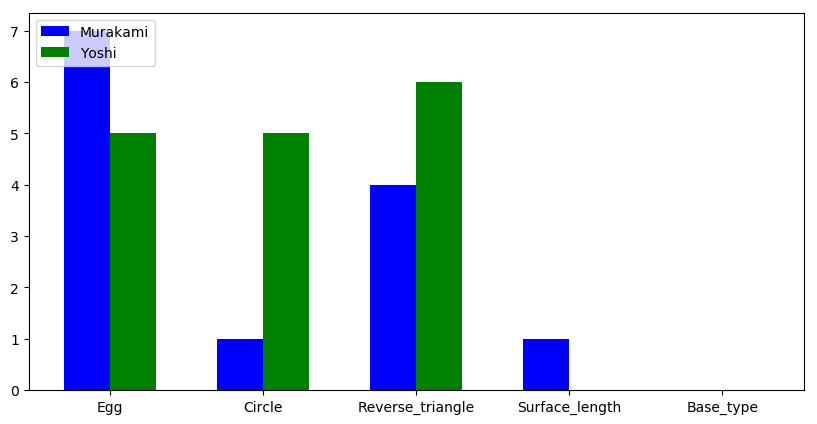

In [26]:
# 服の色を指定して分析(村上、吉井)
# select_color(data_frame1, data_frame2, stringで色の指定)
df_pretty_murakami_color,df_pretty_yoshi_color = select_color(df_pretty_murakami,df_pretty_yoshi,'Pattern')
# 指定した特徴量を抽出
# select_feature(data_frame1, data_frame2, stringで特徴量名の指定)
df_murakami_fea,df_yoshi_fea = select_feature(df_pretty_murakami_color,df_pretty_yoshi_color,'Face_shape')
# 上のデータを元にグラフ描画
show_graph(df_murakami_fea,df_yoshi_fea)

In [27]:
df_pretty_yoshi_color

,name,Face_shape,Hair_len,Eyelid,Eye_shape,Nose_shape,Nose_len,Nose_bridge,Eyebrows,Lips,Mouse,Tears_bag,Dis_eye_brows,Forehead,Barb,Gills,Dis_nose_mouse,Value_of_yoshi,Cloth_color
33,橋本かんな,0.0,0.0,1.0,0.0,NaN,NaN,0.0,2.0,2.0,1.0,0.0,2.0,3.0,2.0,0.0,0.0,1,Pattern
46,武井咲,3.0,0.0,1.0,2.0,NaN,NaN,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,Pattern
60,10,3.0,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1,Pattern
66,16,4.0,0.0,1.0,3.0,0.0,NaN,1.0,0.0,2.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,1,Pattern
67,17,0.0,0.0,1.0,2.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1,Pattern
80,30,0.0,0.0,0.0,2.0,0.0,NaN,1.0,2.0,2.0,1.0,0.0,1.0,3.0,0.0,1.0,0.0,1,Pattern
83,33,3.0,0.0,1.0,2.0,NaN,NaN,1.0,0.0,2.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,1,Pattern
84,34,0.0,0.0,1.0,0.0,NaN,NaN,0.0,2.0,0.0,2.0,0.0,1.0,3.0,2.0,0.0,1.0,1,Pattern
95,45,3.0,0.0,2.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,Pattern
144,43,4.0,1.0,1.0,2.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1,Pattern


## 服の色に対して特徴量間の関係を分析（村上、吉井のそれぞれ）

In [28]:
# 引数に与えた色を持つ要素だけ抽出する関数select_color
def select_color(df1,df2,color):
    return df1[df1['Cloth_color']==color],df2[df2['Cloth_color']==color]

# 存在しないものは0を持たせてインデックスに対応させる
def add_zero(df,list):
    for i in range(0,len(list)):
        if i not in df:
            df[i+0.0] = 0
    return df

# 引数に与えた特徴量だけ抽出する関数select_feature
def select_feature(df1,df2,feature):
    # 色指定された総データ数の出力
    print('総データ数（村上）:{0}'.format(len(df1)))
    print('総データ数（吉井）:{0}\n'.format(len(df2)))
    # 色指定かつ特徴量を指定して抽出
    df_comp1,df_comp2 = df1[feature],df2[feature]
    # 取り出した特徴量ごとの頻度を数えてリストで返す
    df_comp1,df_comp2 = df_comp1.value_counts().sort_index(),df_comp2.value_counts().sort_index()
    # 頻度のリストのデータ数を出力
    print('特徴該当データ数（村上）:{0}'.format(df_comp1.sum()))
    print('特徴該当データ数（吉井）:{0}\n'.format(df_comp2.sum()))
    
    # 特徴量によって名前を付けなおす
    if feature == 'Face_shape':
        index_list=['卵','丸','逆三角','面長','ベース型']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Hair_len':
        index_list = ['ロング','ミディアム','ショート']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Eyelid':
        index_list=['一重','二重','奥二重']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Eye_shape':
        index_list=['丸い目','細い目','アーモンド形','ネコ目','たれ目','アジア人型']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Nose_shape':
        index_list=['団子鼻','豚鼻','ニンニク鼻']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Nose_len':
        index_list=['ローマ鼻','ギリシャ鼻','鷲鼻']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Nose_bridge':
        index_list=['高い','普通','低い']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Eyebrows':
        index_list=['細い','太い','ふつう']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Lips':
        index_list=['厚い','ふつう','薄い']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Mouse':
        index_list=['大きい','ふつう','小さい']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Tears_bag':
        index_list=['ある','ない']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Dis_eye_brows':
        index_list=['遠い','普通','近い']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Forehead':
        index_list=['広い','普通','せまい','わからない']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Barb':
        index_list=['丸い','尖っている','普通']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Gills':
        index_list=['ある','ない']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    elif feature == 'Dis_nose_mouse':
        index_list=['近い','遠い']
        df_comp1,df_comp2 = add_zero(df_comp1,index_list),add_zero(df_comp2,index_list)
    else:
        print('Error')
        
    df_comp1.index=df_comp2.index=index_list
    # 整形後のデータを出力
    print('村上の特徴量データ（{0}）\n{1}\n'.format(feature,df_comp1))
    print('吉井の特徴量データ（{0}）\n{1}'.format(feature,df_comp2))
    # 整形データを返す
    return df_comp1,df_comp2

# リストを2つ与えてそれぞれを並べて棒グラフを出力する関数show_graph
def show_graph(list1,list2):
    y1 = [data for data in list1]
    y2 = [data for data in list2]

    left = np.arange(len(y1))
    labels = list1.index
    plt.figure(figsize=(10,5),dpi=100)
    plt.bar(left,y1,color='b',width=0.3,label='村上',align='center')
    plt.bar(left+0.3,y2,color='g',width=0.3,label='吉井',align='center')

    plt.xticks(left + 0.3/2, labels)
    plt.legend(loc=2)

    plt.show()
